# Politician and political party PK--人物與政黨PK

# Load Data 

In [107]:
import pandas as pd
from datetime import datetime, timedelta

df = pd.read_csv('preprocessed_news_218posts.csv',sep='|')

In [108]:
df.head(1)

,item_id,date,title,content,sentiment,summary,top_key_freq,tokens,tokens_rm_stopwords,entities,token_pos,link,photo_link,category
0,aipl_20220929_1,2022-09-29,台灣國際漁業展、智慧農業週開幕 逾15國參展,外交部政次田中光今天出席2022年「台灣國際漁業展」與「台灣智慧農業週」聯合開幕儀式，他表示...,0.68,"['外交部政次田中光今天出席2022年「台灣國際漁業展」與「台灣智慧農業週」聯合開幕儀式',...","[('展覽', 8), ('台灣', 6), ('廠商', 6), ('參展', 6), (...","['外交部', '政次', '田中光', '今天', '出席', '2022年', '「',...","['外交部', '政次', '田中光', '出席', '台灣', '國際', '漁業展', ...","{(657, 658, 'GPE', '台'), (143, 146, 'PERSON', ...","[('外交部', 'Nc'), ('政次', 'Na'), ('田中光', 'Nb'), (...",https://www.cna.com.tw/news/aipl/202209290375....,https://imgcdn.cna.com.tw/www/WebPhotos/200/20...,政治


# Filter news for a certain person or party: take '柯文哲' for example

In [160]:
# end date: the date of the last record of news
end_date = '2022-10-01'
# start date
weeks = 4 # week duration for analysis
start_date = (datetime.strptime(end_date, '%Y-%m-%d').date() - timedelta(weeks = weeks)).strftime('%Y-%m-%d')

In [165]:
keyword = ['民進黨']

In [166]:
query_df = df[
    (df['date'] >= start_date) & (df['date'] <= end_date) & df['tokens_rm_stopwords'].str.contains('|'.join(keyword))]
query_df

,item_id,date,title,content,sentiment,summary,top_key_freq,tokens,tokens_rm_stopwords,entities,token_pos,link,photo_link,category
2,aipl_20220929_3,2022-09-29,賴清德：支持林佳龍就是做總統後盾肯定蘇貞昌,民進黨新北市長參選人林佳龍今晚和立委余天合體造勢吸引擠爆支持民眾；副總統賴清德籲民眾支持林佳...,0.66,"['副總統賴清德籲民眾支持林佳龍就是期待市政進步、願做總統蔡英文後盾及肯定行政院長蘇貞昌',...","[('林佳龍', 11), ('支持', 11), ('總統', 7), ('蘇貞昌', 7...","['民進黨', '新北市長', '參選人', '林佳龍', '今晚', '和', '立委',...","['民進黨', '新北市長', '參選人', '林佳龍', '立委', '余天合體', '造...","{(154, 157, 'PERSON', '余苑綺'), (299, 302, 'PERS...","[('民進黨', 'Nb'), ('新北市長', 'Na'), ('參選人', 'Na'),...",https://www.cna.com.tw/news/aipl/202209290368....,https://imgcdn.cna.com.tw/www/WebPhotos/200/20...,政治
4,aipl_20220929_5,2022-09-29,警械條例修法朝野共識 4種危急情境警員可逕行開槍,（中央社記者郭建伸、王承中台北29日電）台南殺警案促成立法院加速討論警械使用條例修法。朝野黨...,0.00,"['明確規範警察人員認為犯罪嫌疑人將危及其自身或他人生命、身體時', '民進黨團修正動議羅列...","[('使用', 15), ('警械', 12), ('警察', 9), ('人員', 8),...","['（', '中央社', '記者', '郭建伸', '、', '王承中', '台北', '2...","['中央社', '記者', '郭建伸', '王承中', '台北', '台南', '殺警案',...","{(80, 81, 'CARDINAL', '4'), (10, 13, 'PERSON',...","[('（', 'PARENTHESISCATEGORY'), ('中央社', 'Nc'), ...",https://www.cna.com.tw/news/aipl/202209290358....,https://imgcdn.cna.com.tw/www/webphotos/WebCov...,政治
6,aipl_20220929_7,2022-09-29,黃偉哲推特秀蓬佩奧合照 遭中國網民出征,民進黨立委王定宇昨天中午邀請前美國國務卿蓬佩奧（Michael Pompeo）到台南餐敘，與...,0.00,"['與會的台南市長黃偉哲隨後在推特（Twitter）秀出與蓬佩奧合照', '隨後黃偉哲於推特...","[('黃偉哲', 8), ('蓬佩奧', 6), ('台南', 5), ('中國', 4),...","['民進黨', '立委', '王定宇', '昨天', '中午', '邀請', '前', '美...","['民進黨', '立委', '王定宇', '邀請', '美國', '國務卿', '蓬佩奧',...","{(48, 52, 'ORG', '台南市長'), (20, 23, 'PERSON', '...","[('民進黨', 'Nb'), ('立委', 'Na'), ('王定宇', 'Nb'), (...",https://www.cna.com.tw/news/aipl/202209290339....,https://imgcdn.cna.com.tw/www/WebPhotos/200/20...,政治
9,aipl_20220929_10,2022-09-29,陳時中提北市社宅4年達5.7萬戶 租金採量能付費,民進黨台北市長參選人陳時中今天與民團進行住宅政策座談會，提出4年讓台北市社宅達到5.7萬戶目...,0.00,"['民進黨台北市長參選人陳時中今天與民團進行住宅政策座談會', '他的目標是若卸任時台北已有...","[('陳時中', 13), ('社宅', 11), ('政府', 6), ('參選人', 5...","['民進黨', '台北市長', '參選人', '陳時中', '今天', '與', '民團',...","['民進黨', '台北市長', '參選人', '陳時中', '民團', '進行', '住宅'...","{(952, 956, 'CARDINAL', '1.1萬'), (408, 412, 'C...","[('民進黨', 'Nb'), ('台北市長', 'Na'), ('參選人', 'Na'),...",https://www.cna.com.tw/news/aipl/202209290285....,https://imgcdn.cna.com.tw/www/WebPhotos/200/20...,政治
132,ahel_20220929_13,2022-09-29,學校教官剩約1900人 採自然離退保障工作權,配合教官退出校園政策，教育部今天表示，已於民國106年起停止招考，現職教官則採「自然離退」方...,0.00,"['校園教官人數會歸零或剩下個位數', '現職教官則採「自然離退」方式保障工作權', '估約...","[('教官', 17), ('校園', 7), ('柯建銘', 4), ('政策', 3),...","['配合', '教官', '退出', '校園', '政策', '，', '教育部', '今天...","['配合', '教官', '校園', '政策', '教育部', '招考', '教官', '方...","{(129, 136, 'ORG', '民進黨立院黨團'), (63, 67, 'CARDI...","[('配合', 'VC'), ('教官', 'Na'), ('退出', 'VCL'), ('...",https://www.cna.com.tw/news/ahel/202209290300....,NaN,生活
168,asoc_20220929_11,2022-09-29,林智堅論文風波 余正煌提起侵害著作權刑事自訴,台大今年8月間認定前新竹市長林智堅碩士論文抄襲調查官余正煌論文，撤銷林智堅碩士學位。余正煌今...,0.02,['台大：林智堅論文抄襲情節嚴重 撤銷碩士學位林智堅論文案 中華大學認定抄襲撤銷碩士學位林智...,"[('林智堅', 19), ('論文', 10), ('余正煌', 10), ('碩士', ...","['台大', '今年', '8月', '間', '認定', '前', '新竹', '市長',...","['台大', '新竹', '市長', '林智堅', '碩士', '論文', '抄襲', '調...","{(128, 131, 'PERSON', '潘文忠'), (429, 432, 'PERS...","[('台大', 'Nc'), ('今年', 'Nd'), ('8月', 'Nd'), ('間...",https://www.cna.com.tw/news/asoc/202209290219....,https://imgcdn.cna.com.tw/www/webphotos/WebCov...,社會
172,asoc_20220929_15,2022-09-29,朝NCC大門潑漆 國民黨北市議員參選人無保請回,國民黨台北市議員參選人楊植斗因不滿國家通訊傳播委員會（NCC）針對媒體人周玉蔻及電視台裁罰等...,0.00,"['警方將楊男移送台北地檢署', '楊男潑漆後在臉書（Facebook）上指出', '楊男因...","[('楊男', 5), ('潑漆', 4), ('警方', 3), ('台北市', 2), ...","['國民黨', '台北市', '議員', '參選人', '楊植斗', '因', '不滿', ...","['國民黨', '台北市', '議員', '參選人', '楊植斗', '國家', '通訊',...","{(120, 127, 'TIME', '清晨6時50分'), (3, 6, 'GPE', ...","[('國民黨', 'Nb'), ('台北市', 'Nc'), ('議員', 'Na'), (...",https://www.cna.com.tw/news/asoc/202209290094....,https://imgcdn.cna.com.tw/www/WebPhotos/200/20...,社會


In [141]:
len(query_df)

0

# Count how many pieces of news containing these keywords計算各類別多少篇文章提到該關鍵字

# Count how many times these keywords were mentioned in each category計算各類別出現關鍵字次數

In [167]:
# **計算各類別多少篇文章提到該關鍵字
# **計算各類別出現關鍵字次數

news_categories = ['政治', '科技', '運動', '證卷', '產經', '娛樂', '生活', '國際', '社會', '文化', '兩岸', '全部']


def count_keyword(query_df, keyword):
    cate_occurence = {}
    cate_freq = {}

    for cate in news_categories:
        cate_occurence[cate] = 0
        cate_freq[cate] = 0

    for idx, row in query_df.iterrows():
        # count number of news
        cate_occurence[row.category] += 1
        cate_occurence['全部'] += 1
        # count keyword frequency
        tokens = eval(row.tokens_rm_stopwords)
        freq = len([word for word in tokens if (word in keyword)])
        cate_freq[row.category] += freq
        cate_freq['全部'] += freq
    return cate_freq, cate_occurence

In [168]:
count_keyword(query_df, keyword)

({'政治': 4,
  '科技': 0,
  '運動': 0,
  '證卷': 0,
  '產經': 0,
  '娛樂': 0,
  '生活': 1,
  '國際': 0,
  '社會': 2,
  '文化': 0,
  '兩岸': 0,
  '全部': 7},
 {'政治': 4,
  '科技': 0,
  '運動': 0,
  '證卷': 0,
  '產經': 0,
  '娛樂': 0,
  '生活': 1,
  '國際': 0,
  '社會': 2,
  '文化': 0,
  '兩岸': 0,
  '全部': 7})

# Caclulate date-based reported frequency of these keywords計算被報導的次數以時間為基礎

In [169]:
def get_key_time_freq(query_df, keyword):
    date_samples = query_df.date
    query_freq = pd.DataFrame({'date_index': pd.to_datetime(date_samples), 'freq': [1 for _ in range(len(query_df))]})
    data = query_freq.groupby(pd.Grouper(key='date_index', freq='D')).sum()
    time_data = []
    for i, idx in enumerate(data.index):
        row = {'x': idx.strftime('%Y-%m-%d'), 'y': int(data.iloc[i].freq)}
        time_data.append(row)
    return time_data

In [170]:
get_key_time_freq(query_df, keyword)

[{'x': '2022-09-29', 'y': 7}]

# Sentimental polarity score計算整體情緒分數(影響力)

In [171]:
# sentimental polarity score
def get_article_sentiment(query_df ):
    # query_df = df[df['tokens'].str.contains(query_key)]
    sentiCount = {'pos': 0, 'neg': 0, 'obj': 0}
    sentiPercnt = {'pos': 0, 'neg': 0, 'obj': 0}
    numberOfArticle = len(query_df)
    for senti in query_df.sentiment:
        # 判斷文章的情緒極性
        if senti >= 0.75:
            sentiCount['pos'] += 1
        elif senti <= 0.4:
            sentiCount['neg'] += 1
        else:
            sentiCount['obj'] += 1
    for polar in sentiCount :
        if numberOfArticle != 0:
            sentiPercnt[polar] = int(sentiCount[polar]/numberOfArticle*100)
            # sentiPercnt[polar]=round(sentiCount[polar]/numberOfArticle,2)
        else:
            sentiPercnt[polar] = 0
    return sentiCount, sentiPercnt


In [172]:
get_article_sentiment(query_df)

({'pos': 0, 'neg': 6, 'obj': 1}, {'pos': 0, 'neg': 85, 'obj': 14})

# '台灣','美國','中國' PK

## Define PK set 

In [173]:
pkName = ['台灣', '美國', '中國']
pkset = [['台灣','臺灣'], ['美國'], ['中國']]
color = ['pink', 'blue', 'red']
freqByDate = []
freqByCate = []
sentiInfo = []
photo = [
    "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARIAAAC4CAMAAAAYGZMtAAAAolBMVEXfABIBNoYANob////gCBgIO4jpAAAAOYvlAAB2KWcBN4X//v8ANIUAK4EAMYQALYIAKYAAJn8AI34AIX0AHX0pSI339/oAGHzm5+7Y2uUAJoGcpcLN0N7s7fFgcaK4vtLFyNhwfqpIXpess8syTo9/i7Hn6O2EjrNqeaVWaJ60u86SnL0cQItAV5RPY5pabaA5UpGbo78AD3jR1uAdQYdsK2oWlzVAAAAJZUlEQVR4nO2ci5aqOhKGT8Jx5pwYEhC8oOINbW9o62nn/V9tqgDb7q7ditOz1kasv/dyy0WWfPxVSYrgH42q6O+//qyG/mhoWQ39/dcflRAgkQr+KqAKIRHwdYQUgrx8v3Bj8/9wKKWqhARd8tuRiEq5BDzy+6UqhqQKgVMxJL/bIoJdwi4po3ohUdhcqJoh+VngKKFShdbnwCkklbaLtVE/O0qtkMBFDodLT/4seKqG5EeBA6+NzsYVSjxx4EijVTEIyBdXTs9qmYcOZhUlTMb5aVwizWhulIY/ma/xto7T0OfNCMuO2kI+k0vMeqgMXNgid0g7cZypPS8BEX8/TMV9meXBkahuHIFHzoEj3I7jjAOZLyup/ZUz6N/ZAlUNyb3ptbVxJqnJOmngCrNzHCdKgRFulsLdd5yRxdTyNIEjpZ06zlBpvLSQVSGVNJ3O3ijIuRBN/mvH6YTiYqKncIk5vAATq/NP+pBKMJnglVbSrmPHmbTkU6VX8II7BAiJp/FUdLuHSDb9LHBsA5cWrtT3JZPHRiK1wGYXUqqrMYpe8b0Td6EFUu4uxvczI58qvcLu+pBhSIzOeyWg5gGSiZ1njom0PAeOqGngYJ8syxRZXwP+U6aXM4F8EgyztxAsws5fnGYTVvsXS0lsruvnEtxBF9c9X3STnMO4Jd2XXhRFvTixBrMKEHFm5vJpaJdUDV0iYEyjsztg+RUV2i6cwhs2nbW9ble1Z8p9y9d1IJ7erz58Sn932Aq75MbXxRGePgXWqPNZStXu4LmP1y3jha35fH7qwna9yKCM7eWj2niteQkmVUNyK3DAI+5xuDg0fItrIJcIzCBvey9Md4NhLwb1xou2DdQSWpylW+RV7bqn/eDt1dQwcCB0GonTjAYjD8yASRPamaUbmGXkXNQZj7pBOmzOsA8njNc9LcaQXRb+7cM/nEuyK+4ds9OeLGbCN1ofRi27eHG+aLLz/YWV2vqn12OGqzOztUyvGAbaK1qZOBrMjNJW4HLzAw98/zL1oWE203Ev39J5taWO/4hI4Fr62/ezj9s2jS4gPmpr3eX7hnjvlavJVg1Jud6r1H5yPu9lqx0RHrCAHbVjX03O2WVmizJ1HQMHpW3hk40XTqg/zpq20k72prf2yh77UZEI4S+aWBxJ+0ck8g2T5txf4rZe25Y+dNWQlB/2qf4WznXgnzrfOCTT2MMxUHyw70eubeDgxexPwSRBco2I0xwFC6d3sPnp1tsluKu/TcJZnCXSX+LAl0l3/ja3WZVN1tglxcBPStPwtr/GceHSlg2DAz6JH6ttvwR7sNAQG+vpMLqBxFl6um/zOqR6SCRlAgctYqxpHJZbZa8mV9TYbW9WqXIBiyhip26Bg+7wW7slDuPG4foWESc6/YOvybTdRbfUzCXIw/XTGQxbcnMMwulNJC/tbpy96fSS1UH3jZC1cQmWTk262ESXWDl2b2VXIDHvXkbJ8XCwNg/mkqtfVej95P30sIndhttv+/LvSA7dT5WUKBHXw6dqSK4EDtZbjd+eLSbx+fwG4bKMS+Kij4KhsxP+jalsVUNyJW6K8ryxQbjfbjK3JOHqJpLe6Z8s0ooEa+QNkzyUS0TeP4P/jGcb7eWkN/YON5EMpQvBMkqVh3eOsZxdn/T6SVprN2jMGsHVfgmGS+KfZl7WWSt56EdFgrdwlLbW39xyyQh6dVLecWO4akjuKA5Asj2N+reSSRykr1YJ+QzFASDivkVB48Yg5xjsnaUVovyhq4akrEtgP3uIsBxyvf/6Mg8htBJXiXq7BO/uyrwuP/H9qzZZBDtMwEcP762Xm9n4kEiw9IFzA7BBWbXm8fdEJq18rpYzgCZHq1LTPauGpFTggEvsPMruTDi9+ZXQiVIPNyK6gY9FJCnqGTjQotpT7zy4Gbrv0ym+qrfz1kW/pekMDE56fECXlOCB02z252CJh8eT9qe/jJ3oZMw6eR84j3U2beDhkNwIHJH1ye0un4wVJ9Od52lt/P37Db/LwDhJfejM+Y318i2nsrG6jnf7sj7rDEzRGW5nYctYpex0qAN/e254CiaTdRCOItzduKGdJtHZJ3VzCQxjlXmNXjartvZsVjEQwdjpjWy/MR3GRYx0XpK9CdIttEc2L85bN91th53xSdfQJXDVVyvTslrnsxphGesE413Xa81Xyy1osVatVjhFXxxdne+E07LC+WJWwiaPhgQvorHnfld2L2eUe+NtrXUYBkEQhn1tt3n1LcJKK/okqyno+pWjf7Eg5fvNrZk5JcvVajU9brVNipVClz7UowYOuaLa5PN/45kri1K8M/Bka5un2oV75xEf3SW4e6OZE7FK9IviyQgSbzH/ZOJfvZtVR5coO0Iz4BwjIbNubNNp4uwa3RpkHdhTmfRRaZfc+fWlgiYYWl2cY6SEmWWZdhgo7MCEx7NjHhvJvelVY4mgOcrmKuYLWAlQ+KCWNuM8rzzVI0pSGHxWbeXnn5NBlkxG2aMEEDv4xEGvW74QXQeXaGyCOyuv+AWl7Ek/5+Wg881Sa2DSzuZQPI9LdPjmrNysz4620CmmEv/8QIXU3sRZlJsAXF2X3IcERjzNbSDleXqRcmGIvD1P58RnEPRk4t75owxVQ3Jnv8ROl0Zf1mgLyWRv8geDszUm3TzXA/ZKnOyH5Cmlu4ReyacSq1bZQ8NP4xLIFvrTZCvomQxdLdWHffWXg9bcJVmEfOieKuXFA+/Lbaw7f6ujci65Dwl+/c+5s59M7aeJi7JkEbq6SH72KzcwMH7FXkmJfesaOF+F9aWfHaGCLvnpyYgfQq0gkh/+rlr2jwPngzCZsEtubH56l/xfxEiIqoaEA+ej2CVEhUt+v6r0o+v/ror+Uxkk/6qMfjeLQn/CH+uTGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIGF90X8Bq4/bnH4W/3QAAAAASUVORK5CYII=",
    "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACeCAMAAAC/1seNAAAAb1BMVEWyIjT///88O2703uHKZnPcmqLiq7LEVWP67/Hr4eeXlrI/PnDu7vLr6/Dy8vWenberqsBLSnlUVICRkK3Pz9tXVoK4uMpEQ3RnZo5wb5XJyNeiorpQT32wsMRkY4xubZOHhqbY2OJ6eZyCgaJ1dZlZ8INYAAADpUlEQVR4nO3d2XLaUBAEUCQ7m8SqJQaDDQT+/xsjgRbQxbFm4lHXVfV5oCrzND3gxHRMMglBJj7isQR4LIFm+zh2ExnO0LlVmu3PZzec4QydW6XZ/u3NDWc4Q+dWqZePp1Pn68Zyhs6tctk8yYKLY94mM56hc6tUz/mizLG8ey3YztC5VeoksyCYdb5uTGfo3CrV7uvg9TVY34cznaFzq1S7bxdxmG7vw5nO0LlVqt13zUPxW3FiPwufPPTo7U6a2s/CwEOPjpVl9rNRHCuJouJP+EUUJXaz0Rwr/DMvx/OT5Ww0xwqTaRBME9vZaI61Kscr29lojnWY7dezg+3M+2PVxdyheBWsDrYz74+12TjPvuUMHVwDVv6hg2vAyj90cI3rsfLj9VfH9zaZ8ezZQyz/JOooZTEXdljO0LlVqt1Z/vVR7c7yr49q99tibrezn3l9rFuDlH/o3CoPcgxS/qFzq3Qy5FEUBUHxkNvNRnOswco/dG6Vboihyj90bhUnxUDlHzq3ipPiMD3vnQLvi2eFbx5yy7+0LOtS21noc+tQYvn3KZZ/Am35N3tQ1hnO0ME16p/8mxffDs3n2e3fJdvO0ME16vJvWf7i98vd68B0hon7f2DlHzq4Rlv+ZZlb1hnO0ME1YOUfOrhGfaykeWjLOsuZ18e6xZ/8+wCs/PvuIZZ/Et1nnOXfP3RDhHlZ1uW2s9Eci+Xfx5wUA5V/6NwqzfYDl3/o3CrN9gOXf+jcKs32/Njv5+rlhy7/0LlVLpsDyj90bpVrkpcHZZ3tDJ1bpY4ydPn3w0Ms/wSa8m8bx1G3rLOcoYNrsPwTYPknwI/9CsDKP3RwDeeVdbqWdanlbDTHGqr8QwfX4Md+BR6Wf5vZyXbm/bGasq74rmjXLfC+eOb9sfZ759m3nP300E35t3TDGc7QBYJKvTzLvx4um+d1MXf77aTtDJ1b5ZqE5V8vdRR+7LeHavf3sph7v89mOkPnVql23y7jeNEt6yxn6Nwq1e5589AynaFzq4Qg6NwqPJYAjyXAYwn8AkG/KdaYYMoOP/FYAjyWAI8lwGMJ8FgCPJYAjyXAYwnwWAI8lsAE/UOtPkG/jyciIiIiIrKC/sdwfMLWQYDHEuCxBHgsAR5LgMcS4LEEeCwBHkuAxxLgsQQm6P9Ewyfo9/FERERERERWnqk3tg4CPJYAjyXAYwnwWAI8lgCPJcBjCfBYAjyWAI8lMHmi3tDv44mIiIiIiAjvLw24O4/KQGb1AAAAAElFTkSuQmCC",
    "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAAC3CAMAAAAGjUrGAAAAllBMVEXeKRCFWFXjJQP/3gD/4ADdIBD/3QDeJhD/8ADnbwn/4gDdGhD/5QCHV1T/2gD/5wDdERBrYWDpIAD+0wDhRQ/wmgjujgnfMA/1rwb/6wD7zgDrfQrvlAnndA3+1wD/8gDkWw3lSQ3yqAf0ogbmZgrthQb6xAPlaA7iTw7ysAblWQ32uwLqdgbnVA7hOBD8wwPugwn7uQARyPrpAAAHM0lEQVR4nO2caVOrPBSAURJiEwpRtpZWLt3ojvb//7mXtqjV0yXhHSo45/HLnam3Dg85C0mI8dx9QE7pPhvdl0fklJeu8fBoIKc8PqCTn6ATCDqBoBMIOoGgE0jtThit89troW4n1O/IGr++FupyIo7DgxrjCTo5wqaRZMygMnBn6OQIG8ZDnwk64w7GTgmLHDcL/anHvTk6KaFzh3PHIyReoJMSxpbcJMQkcSpFDd9fJ7pOisSp+Iu+Q8w9cbiiolVNirYT5V+MvKMTYnu915Hy/2sAmk5Emqr9IouCUgl3/7nrTZsGiqYTOV6qZQcxtvfpxDS93Sz1ozYNE00n1FjHvsr1ydDu9+OYmNbQoKJd6UTTiUgdU6kHC/kyTBerhDuD1pVi3XESmv2Jwk2P0ohSKcTQTl5bFTYHtJywaFk0YUq15yCO+Zk9bVfc7NFyIlOPWE+p+p2nc776605CyzR5oH6VjI3/+jgRRb9edOsalZX5p2WqJalFx4nY7tt1knQ0bv3pswBdtaNP0XIysPedqasRPN+Qw7Bs+Jo9SavhhOY7vnfC1xVvN311Z3spjPrTvMEjRsfJtnyq61esJXRKzA5lIgrfhk2eP9BwIgbJ0YkdVrsitvB48hrNYq6Tpu+PhhO2O6STIst61SoIy9fFY2HmkoY3/OpOxCLjpRNrWyl4aNTb1y2TrJucTXScyHfXLCFVKg9ji/CQkIpi3uRsctEJo5Dep5Oi8gjw8fVbz8RiEtvkGHppo0PnghOabjo/GZTzq4erCuHHaXTlz7B8wjkn5dRbPG20lPNOxHbd//f0jX/up5LiqvpPPz59ytJrASG2mzDoZYfCRQhv9ki5EDuUDTxuWqeYp1jfP+JeGF3PEVQIEfmd/cxb7Niu1+SRcinHMrnqWcRUgpBsKxUqCWMyI3ycr96Hy53f3Pb+ct0RUeBwJSXOxFdRUiAzzkdSSGqM8jY6MSjtZPz2UOHxQHkOWu7c49YLdqNM/SrX+hMm/ZvxU8SCxoKwDJJtg2WUXO/ZaBRaV+OHJwHVaMDEu8oM929zo49lRVW+HD+ErFeKmaT8Or8Ni6Q3e3vhTyz7ghJz4gu9a1Regv9Nbj/vUPp+Pn5IMqUtiAR9VJ4B5WjtQCVWkVz/pBK152LpZyCnkGTU4Fb0f6HkREzPpFlScbat+Sg5ocMnCzjh4zbkyyqoOKEiPpNkSdyGuloFFSds60IlBQ2fLquMUuwEZ7s20quQZNtQvRWcsDz7Ch3+9U/i6D/IMb/1zzsH6Nz7GCfE3u3I1xTkRnug0E6VwXVnVJwMP9IJtyZ5FH4+//CxvpMhaX4Suu2ERR8NG4/nlDE5/VznyXQny5ixczeNl6LgxO8fDfDl9nA51O8d56uJM9d14icVBte9ue1EzOyjgNlHzaBs5h2GCpko3/PjgpEc2MRbyIZvDr3phBnxflDwt+nXtAATq7d9qtXYspRPNwWdNTGtXhAEk957c+vPTSd0lZB93Hxfq6DRZP/ShfoLS3SWWI5zWDbjnNu8p7T1+He47STgJvcGP6fTmBwU40cjOcjV2vko4/udxA2OnltOWLSz+Vt6ZoZRbNc2z9R3XYh8+LE2ms01p+fuyy0nNOXOMDp7U6kMPDJXr6xMdo5ro5nf7HJ8y4mYJZuL41y8Zjq7Lmha5JPix5u23EmwuDLOhR9q5Eo5tAjxCKm0feWO3M6xV+8pM67tsPiBjLm1XIwd8tbgomMo9SdX0VicoJHFg1xEm8TUyEK/wB3PtZChtynq137Fddno/v6OTlhYriyLfHCfv1iRu55/8pFaWaNDp34nzS4xZ6nbiUiv7nNrJHWd4VBO1co0xnMtSiL/cEoBNTJn0broqccJy3vhVkgqAjtrdn92jprGCV31nd1gNHN5tkAnJTRwSRJ7hGeNfi3lLLWdf5JnnBzPP2GiyZscz1BbLabp8Q0oK+4NRu06FqY2J0zE5awaMbNJR+Px+depz8mwVOISL5606m302s6s2zjksNzhTV4XUVvetj5SVy1OTZd7+60846KlbZWR2nq2RRKvh9NRbFtBy4QYtY2T+WCRUyY2idXCnYB1xc4xYMSk6rvIv0m9cwXU99DJT+jmr58dVIEor/HLa6L+s5fr/PJ6wDO6IegEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ARSOOm+PCKnvHSN5+4Dckr3+T/sRGsYgigPVgAAAABJRU5ErkJggg=="
         ]

for keyword in pkset:
    query_df = df[
        (df['date'] >= start_date) & (df['date'] <= end_date) & df['tokens_rm_stopwords'].str.contains('|'.join(keyword))]
    # query_df = df[df['tokens_rm_stopwords'].str.contains('|'.join(keyword))]
    # print(len(query_df))
    freqByDate.append(get_key_time_freq(query_df, keyword))

    cate_freq, cate_occurence = count_keyword(query_df, keyword)

    selectedCategories = ['全部', '政治', '兩岸', '產經', '生活', '社會']
    # selectedCategories = ['政治', '產經', '生活', '國際', '社會', '兩岸','全部']

    freq = [cate_occurence[k] for k in selectedCategories]
    freqByCate.append(freq)

    # sentiment information
    sentiCount, sentiPercnt = get_article_sentiment(query_df)
    #sentiInfo = '正向:{}%, 中立:{}%, 負向:{}%'.format(str(sentiPercnt['pos']), str(sentiPercnt['obj']),
    #                                            str(sentiPercnt['neg']))
    senti = [sentiPercnt[p] for p in ['pos','obj','neg']]
    sentiInfo.append(senti)

data_pk =  {'freqByDate': freqByDate,
           'pkName': pkName,
           'color': color,
           'photo': photo,
           'freqByCate': freqByCate,
           'category': selectedCategories,
           'sentiInfo': sentiInfo,
           }

{'freqByDate': [[{'x': '2022-09-22', 'y': 2},
   {'x': '2022-09-23', 'y': 0},
   {'x': '2022-09-24', 'y': 0},
   {'x': '2022-09-25', 'y': 0},
   {'x': '2022-09-26', 'y': 0},
   {'x': '2022-09-27', 'y': 2},
   {'x': '2022-09-28', 'y': 11},
   {'x': '2022-09-29', 'y': 63}],
  [{'x': '2022-09-22', 'y': 1},
   {'x': '2022-09-23', 'y': 1},
   {'x': '2022-09-24', 'y': 1},
   {'x': '2022-09-25', 'y': 1},
   {'x': '2022-09-26', 'y': 0},
   {'x': '2022-09-27', 'y': 4},
   {'x': '2022-09-28', 'y': 6},
   {'x': '2022-09-29', 'y': 40}],
  [{'x': '2022-09-28', 'y': 4}, {'x': '2022-09-29', 'y': 27}]],
 'pkName': ['台灣', '美國', '中國'],
 'color': ['pink', 'blue', 'red'],
 'photo': ['',
  '',
  ''],
 'freqByCate': [[78, 10, 4, 8, 7, 5],
  [54, 5, 3, 3, 3, 0],
  [31, 4, 15, 2, 0, 0]],
 'category': ['全部', '政治', '兩岸', '產經', '生活', '社會'],
 'sentiInfo': [[23, 2, 74], [24, 0, 75], [25, 3, 70]]}
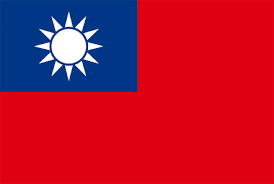
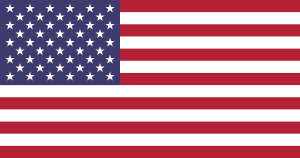
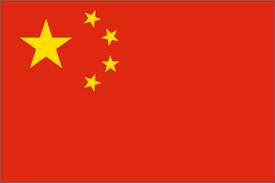

In [174]:
data_pk

## Save PK data to csv file

類別新聞關鍵字存檔

In [175]:
df_data_pk = pd.DataFrame(list(data_pk.items()),columns=['name','value'])

In [176]:
df_data_pk

,name,value
0,freqByDate,"[[{'x': '2022-09-22', 'y': 2}, {'x': '2022-09-..."
1,pkName,"[台灣, 美國, 中國]"
2,color,"[pink, blue, red]"
3,photo,"[data:image/png;base64,iVBORw0KGgoAAAANSUhEUgA..."
4,freqByCate,"[[78, 10, 4, 8, 7, 5], [54, 5, 3, 3, 3, 0], [3..."
5,category,"[全部, 政治, 兩岸, 產經, 生活, 社會]"
6,sentiInfo,"[[23, 2, 74], [24, 0, 75], [25, 3, 70]]"


In [177]:
## 存成csv格式檔案

df_data_pk.to_csv('pk_nation.csv',sep='|', index = None)

### Alternative way: using zip

In [178]:
k = list(data_pk.keys())
v = list(data_pk.values())

In [21]:
#list(zip(k,v))

In [179]:
df_data_pk = pd.DataFrame(list(zip(k,v)),columns=['name','value'])
df_data_pk

,name,value
0,freqByDate,"[[{'x': '2022-09-22', 'y': 2}, {'x': '2022-09-..."
1,pkName,"[台灣, 美國, 中國]"
2,color,"[pink, blue, red]"
3,photo,"[data:image/png;base64,iVBORw0KGgoAAAANSUhEUgA..."
4,freqByCate,"[[78, 10, 4, 8, 7, 5], [54, 5, 3, 3, 3, 0], [3..."
5,category,"[全部, 政治, 兩岸, 產經, 生活, 社會]"
6,sentiInfo,"[[23, 2, 74], [24, 0, 75], [25, 3, 70]]"


## Read csv file and convert to dict format

In [180]:
df_data_pk = pd.read_csv('pk_nation.csv',sep='|')

In [181]:
df_data_pk 

,name,value
0,freqByDate,"[[{'x': '2022-09-22', 'y': 2}, {'x': '2022-09-..."
1,pkName,"['台灣', '美國', '中國']"
2,color,"['pink', 'blue', 'red']"
3,photo,"['data:image/png;base64,iVBORw0KGgoAAAANSUhEUg..."
4,freqByCate,"[[78, 10, 4, 8, 7, 5], [54, 5, 3, 3, 3, 0], [3..."
5,category,"['全部', '政治', '兩岸', '產經', '生活', '社會']"
6,sentiInfo,"[[23, 2, 74], [24, 0, 75], [25, 3, 70]]"


{'freqByDate': "[[{'x': '2022-09-22', 'y': 2}, {'x': '2022-09-23', 'y': 0}, {'x': '2022-09-24', 'y': 0}, {'x': '2022-09-25', 'y': 0}, {'x': '2022-09-26', 'y': 0}, {'x': '2022-09-27', 'y': 2}, {'x': '2022-09-28', 'y': 11}, {'x': '2022-09-29', 'y': 63}], [{'x': '2022-09-22', 'y': 1}, {'x': '2022-09-23', 'y': 1}, {'x': '2022-09-24', 'y': 1}, {'x': '2022-09-25', 'y': 1}, {'x': '2022-09-26', 'y': 0}, {'x': '2022-09-27', 'y': 4}, {'x': '2022-09-28', 'y': 6}, {'x': '2022-09-29', 'y': 40}], [{'x': '2022-09-28', 'y': 4}, {'x': '2022-09-29', 'y': 27}]]",
 'pkName': "['台灣', '美國', '中國']",
 'color': "['pink', 'blue', 'red']",
 'photo': "['', '', '']",
 'freqByCate': '[[78, 10, 4, 8, 7, 5], [54, 5, 3, 3, 3, 0], [31, 4, 15, 2, 0, 0]]',
 'category': "['全部', '政治', '兩岸', '產經', '生活', '社會']",
 'sentiInfo': '[[23, 2, 74], [24, 0, 75], [25, 3, 70]]'}
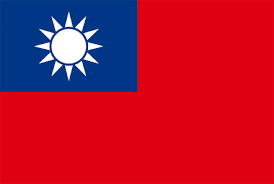
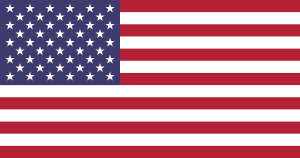
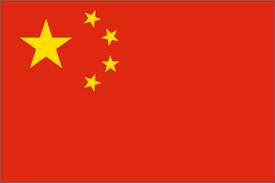

In [182]:
# Convert to dictionary format
dict(list(df_data_pk.values))

## All-in-one function

In [190]:
def pk_nation():

    # end date: the date of the last record of news
    end_date = '2022-10-01'
    # start date
    weeks = 4 # week duration for analysis
    start_date = (datetime.strptime(end_date, '%Y-%m-%d').date() - timedelta(weeks=weeks)).strftime('%Y-%m-%d')

    pkName = ['台灣', '美國', '中國']
    pkset = [['台灣','臺灣'], ['美國'], ['中國']]
    color = ['pink', 'blue', 'red']
    freqByDate = []
    freqByCate = []
    sentiInfo = []
    photo = [
        "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARIAAAC4CAMAAAAYGZMtAAAAolBMVEXfABIBNoYANob////gCBgIO4jpAAAAOYvlAAB2KWcBN4X//v8ANIUAK4EAMYQALYIAKYAAJn8AI34AIX0AHX0pSI339/oAGHzm5+7Y2uUAJoGcpcLN0N7s7fFgcaK4vtLFyNhwfqpIXpess8syTo9/i7Hn6O2EjrNqeaVWaJ60u86SnL0cQItAV5RPY5pabaA5UpGbo78AD3jR1uAdQYdsK2oWlzVAAAAJZUlEQVR4nO2ci5aqOhKGT8Jx5pwYEhC8oOINbW9o62nn/V9tqgDb7q7ditOz1kasv/dyy0WWfPxVSYrgH42q6O+//qyG/mhoWQ39/dcflRAgkQr+KqAKIRHwdYQUgrx8v3Bj8/9wKKWqhARd8tuRiEq5BDzy+6UqhqQKgVMxJL/bIoJdwi4po3ohUdhcqJoh+VngKKFShdbnwCkklbaLtVE/O0qtkMBFDodLT/4seKqG5EeBA6+NzsYVSjxx4EijVTEIyBdXTs9qmYcOZhUlTMb5aVwizWhulIY/ma/xto7T0OfNCMuO2kI+k0vMeqgMXNgid0g7cZypPS8BEX8/TMV9meXBkahuHIFHzoEj3I7jjAOZLyup/ZUz6N/ZAlUNyb3ptbVxJqnJOmngCrNzHCdKgRFulsLdd5yRxdTyNIEjpZ06zlBpvLSQVSGVNJ3O3ijIuRBN/mvH6YTiYqKncIk5vAATq/NP+pBKMJnglVbSrmPHmbTkU6VX8II7BAiJp/FUdLuHSDb9LHBsA5cWrtT3JZPHRiK1wGYXUqqrMYpe8b0Td6EFUu4uxvczI58qvcLu+pBhSIzOeyWg5gGSiZ1njom0PAeOqGngYJ8syxRZXwP+U6aXM4F8EgyztxAsws5fnGYTVvsXS0lsruvnEtxBF9c9X3STnMO4Jd2XXhRFvTixBrMKEHFm5vJpaJdUDV0iYEyjsztg+RUV2i6cwhs2nbW9ble1Z8p9y9d1IJ7erz58Sn932Aq75MbXxRGePgXWqPNZStXu4LmP1y3jha35fH7qwna9yKCM7eWj2niteQkmVUNyK3DAI+5xuDg0fItrIJcIzCBvey9Md4NhLwb1xou2DdQSWpylW+RV7bqn/eDt1dQwcCB0GonTjAYjD8yASRPamaUbmGXkXNQZj7pBOmzOsA8njNc9LcaQXRb+7cM/nEuyK+4ds9OeLGbCN1ofRi27eHG+aLLz/YWV2vqn12OGqzOztUyvGAbaK1qZOBrMjNJW4HLzAw98/zL1oWE203Ev39J5taWO/4hI4Fr62/ezj9s2jS4gPmpr3eX7hnjvlavJVg1Jud6r1H5yPu9lqx0RHrCAHbVjX03O2WVmizJ1HQMHpW3hk40XTqg/zpq20k72prf2yh77UZEI4S+aWBxJ+0ck8g2T5txf4rZe25Y+dNWQlB/2qf4WznXgnzrfOCTT2MMxUHyw70eubeDgxexPwSRBco2I0xwFC6d3sPnp1tsluKu/TcJZnCXSX+LAl0l3/ja3WZVN1tglxcBPStPwtr/GceHSlg2DAz6JH6ttvwR7sNAQG+vpMLqBxFl6um/zOqR6SCRlAgctYqxpHJZbZa8mV9TYbW9WqXIBiyhip26Bg+7wW7slDuPG4foWESc6/YOvybTdRbfUzCXIw/XTGQxbcnMMwulNJC/tbpy96fSS1UH3jZC1cQmWTk262ESXWDl2b2VXIDHvXkbJ8XCwNg/mkqtfVej95P30sIndhttv+/LvSA7dT5WUKBHXw6dqSK4EDtZbjd+eLSbx+fwG4bKMS+Kij4KhsxP+jalsVUNyJW6K8ryxQbjfbjK3JOHqJpLe6Z8s0ooEa+QNkzyUS0TeP4P/jGcb7eWkN/YON5EMpQvBMkqVh3eOsZxdn/T6SVprN2jMGsHVfgmGS+KfZl7WWSt56EdFgrdwlLbW39xyyQh6dVLecWO4akjuKA5Asj2N+reSSRykr1YJ+QzFASDivkVB48Yg5xjsnaUVovyhq4akrEtgP3uIsBxyvf/6Mg8htBJXiXq7BO/uyrwuP/H9qzZZBDtMwEcP762Xm9n4kEiw9IFzA7BBWbXm8fdEJq18rpYzgCZHq1LTPauGpFTggEvsPMruTDi9+ZXQiVIPNyK6gY9FJCnqGTjQotpT7zy4Gbrv0ym+qrfz1kW/pekMDE56fECXlOCB02z252CJh8eT9qe/jJ3oZMw6eR84j3U2beDhkNwIHJH1ye0un4wVJ9Od52lt/P37Db/LwDhJfejM+Y318i2nsrG6jnf7sj7rDEzRGW5nYctYpex0qAN/e254CiaTdRCOItzduKGdJtHZJ3VzCQxjlXmNXjartvZsVjEQwdjpjWy/MR3GRYx0XpK9CdIttEc2L85bN91th53xSdfQJXDVVyvTslrnsxphGesE413Xa81Xyy1osVatVjhFXxxdne+E07LC+WJWwiaPhgQvorHnfld2L2eUe+NtrXUYBkEQhn1tt3n1LcJKK/okqyno+pWjf7Eg5fvNrZk5JcvVajU9brVNipVClz7UowYOuaLa5PN/45kri1K8M/Bka5un2oV75xEf3SW4e6OZE7FK9IviyQgSbzH/ZOJfvZtVR5coO0Iz4BwjIbNubNNp4uwa3RpkHdhTmfRRaZfc+fWlgiYYWl2cY6SEmWWZdhgo7MCEx7NjHhvJvelVY4mgOcrmKuYLWAlQ+KCWNuM8rzzVI0pSGHxWbeXnn5NBlkxG2aMEEDv4xEGvW74QXQeXaGyCOyuv+AWl7Ek/5+Wg881Sa2DSzuZQPI9LdPjmrNysz4620CmmEv/8QIXU3sRZlJsAXF2X3IcERjzNbSDleXqRcmGIvD1P58RnEPRk4t75owxVQ3Jnv8ROl0Zf1mgLyWRv8geDszUm3TzXA/ZKnOyH5Cmlu4ReyacSq1bZQ8NP4xLIFvrTZCvomQxdLdWHffWXg9bcJVmEfOieKuXFA+/Lbaw7f6ujci65Dwl+/c+5s59M7aeJi7JkEbq6SH72KzcwMH7FXkmJfesaOF+F9aWfHaGCLvnpyYgfQq0gkh/+rlr2jwPngzCZsEtubH56l/xfxEiIqoaEA+ej2CVEhUt+v6r0o+v/ror+Uxkk/6qMfjeLQn/CH+uTGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIyFiJESMhIiREDESIkZCxEiIGAkRIGF90X8Bq4/bnH4W/3QAAAAASUVORK5CYII=",
        "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACeCAMAAAC/1seNAAAAb1BMVEWyIjT///88O2703uHKZnPcmqLiq7LEVWP67/Hr4eeXlrI/PnDu7vLr6/Dy8vWenberqsBLSnlUVICRkK3Pz9tXVoK4uMpEQ3RnZo5wb5XJyNeiorpQT32wsMRkY4xubZOHhqbY2OJ6eZyCgaJ1dZlZ8INYAAADpUlEQVR4nO3d2XLaUBAEUCQ7m8SqJQaDDQT+/xsjgRbQxbFm4lHXVfV5oCrzND3gxHRMMglBJj7isQR4LIFm+zh2ExnO0LlVmu3PZzec4QydW6XZ/u3NDWc4Q+dWqZePp1Pn68Zyhs6tctk8yYKLY94mM56hc6tUz/mizLG8ey3YztC5VeoksyCYdb5uTGfo3CrV7uvg9TVY34cznaFzq1S7bxdxmG7vw5nO0LlVqt13zUPxW3FiPwufPPTo7U6a2s/CwEOPjpVl9rNRHCuJouJP+EUUJXaz0Rwr/DMvx/OT5Ww0xwqTaRBME9vZaI61Kscr29lojnWY7dezg+3M+2PVxdyheBWsDrYz74+12TjPvuUMHVwDVv6hg2vAyj90cI3rsfLj9VfH9zaZ8ezZQyz/JOooZTEXdljO0LlVqt1Z/vVR7c7yr49q99tibrezn3l9rFuDlH/o3CoPcgxS/qFzq3Qy5FEUBUHxkNvNRnOswco/dG6Vboihyj90bhUnxUDlHzq3ipPiMD3vnQLvi2eFbx5yy7+0LOtS21noc+tQYvn3KZZ/Am35N3tQ1hnO0ME16p/8mxffDs3n2e3fJdvO0ME16vJvWf7i98vd68B0hon7f2DlHzq4Rlv+ZZlb1hnO0ME1YOUfOrhGfaykeWjLOsuZ18e6xZ/8+wCs/PvuIZZ/Et1nnOXfP3RDhHlZ1uW2s9Eci+Xfx5wUA5V/6NwqzfYDl3/o3CrN9gOXf+jcKs32/Njv5+rlhy7/0LlVLpsDyj90bpVrkpcHZZ3tDJ1bpY4ydPn3w0Ms/wSa8m8bx1G3rLOcoYNrsPwTYPknwI/9CsDKP3RwDeeVdbqWdanlbDTHGqr8QwfX4Md+BR6Wf5vZyXbm/bGasq74rmjXLfC+eOb9sfZ759m3nP300E35t3TDGc7QBYJKvTzLvx4um+d1MXf77aTtDJ1b5ZqE5V8vdRR+7LeHavf3sph7v89mOkPnVql23y7jeNEt6yxn6Nwq1e5589AynaFzq4Qg6NwqPJYAjyXAYwn8AkG/KdaYYMoOP/FYAjyWAI8lwGMJ8FgCPJYAjyXAYwnwWAI8lsAE/UOtPkG/jyciIiIiIrKC/sdwfMLWQYDHEuCxBHgsAR5LgMcS4LEEeCwBHkuAxxLgsQQm6P9Ewyfo9/FERERERERWnqk3tg4CPJYAjyXAYwnwWAI8lgCPJcBjCfBYAjyWAI8lMHmi3tDv44mIiIiIiAjvLw24O4/KQGb1AAAAAElFTkSuQmCC",
        "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAAC3CAMAAAAGjUrGAAAAllBMVEXeKRCFWFXjJQP/3gD/4ADdIBD/3QDeJhD/8ADnbwn/4gDdGhD/5QCHV1T/2gD/5wDdERBrYWDpIAD+0wDhRQ/wmgjujgnfMA/1rwb/6wD7zgDrfQrvlAnndA3+1wD/8gDkWw3lSQ3yqAf0ogbmZgrthQb6xAPlaA7iTw7ysAblWQ32uwLqdgbnVA7hOBD8wwPugwn7uQARyPrpAAAHM0lEQVR4nO2caVOrPBSAURJiEwpRtpZWLt3ojvb//7mXtqjV0yXhHSo45/HLnam3Dg85C0mI8dx9QE7pPhvdl0fklJeu8fBoIKc8PqCTn6ATCDqBoBMIOoGgE0jtThit89troW4n1O/IGr++FupyIo7DgxrjCTo5wqaRZMygMnBn6OQIG8ZDnwk64w7GTgmLHDcL/anHvTk6KaFzh3PHIyReoJMSxpbcJMQkcSpFDd9fJ7pOisSp+Iu+Q8w9cbiiolVNirYT5V+MvKMTYnu915Hy/2sAmk5Emqr9IouCUgl3/7nrTZsGiqYTOV6qZQcxtvfpxDS93Sz1ozYNE00n1FjHvsr1ydDu9+OYmNbQoKJd6UTTiUgdU6kHC/kyTBerhDuD1pVi3XESmv2Jwk2P0ohSKcTQTl5bFTYHtJywaFk0YUq15yCO+Zk9bVfc7NFyIlOPWE+p+p2nc776605CyzR5oH6VjI3/+jgRRb9edOsalZX5p2WqJalFx4nY7tt1knQ0bv3pswBdtaNP0XIysPedqasRPN+Qw7Bs+Jo9SavhhOY7vnfC1xVvN311Z3spjPrTvMEjRsfJtnyq61esJXRKzA5lIgrfhk2eP9BwIgbJ0YkdVrsitvB48hrNYq6Tpu+PhhO2O6STIst61SoIy9fFY2HmkoY3/OpOxCLjpRNrWyl4aNTb1y2TrJucTXScyHfXLCFVKg9ji/CQkIpi3uRsctEJo5Dep5Oi8gjw8fVbz8RiEtvkGHppo0PnghOabjo/GZTzq4erCuHHaXTlz7B8wjkn5dRbPG20lPNOxHbd//f0jX/up5LiqvpPPz59ytJrASG2mzDoZYfCRQhv9ki5EDuUDTxuWqeYp1jfP+JeGF3PEVQIEfmd/cxb7Niu1+SRcinHMrnqWcRUgpBsKxUqCWMyI3ycr96Hy53f3Pb+ct0RUeBwJSXOxFdRUiAzzkdSSGqM8jY6MSjtZPz2UOHxQHkOWu7c49YLdqNM/SrX+hMm/ZvxU8SCxoKwDJJtg2WUXO/ZaBRaV+OHJwHVaMDEu8oM929zo49lRVW+HD+ErFeKmaT8Or8Ni6Q3e3vhTyz7ghJz4gu9a1Regv9Nbj/vUPp+Pn5IMqUtiAR9VJ4B5WjtQCVWkVz/pBK152LpZyCnkGTU4Fb0f6HkREzPpFlScbat+Sg5ocMnCzjh4zbkyyqoOKEiPpNkSdyGuloFFSds60IlBQ2fLquMUuwEZ7s20quQZNtQvRWcsDz7Ch3+9U/i6D/IMb/1zzsH6Nz7GCfE3u3I1xTkRnug0E6VwXVnVJwMP9IJtyZ5FH4+//CxvpMhaX4Suu2ERR8NG4/nlDE5/VznyXQny5ixczeNl6LgxO8fDfDl9nA51O8d56uJM9d14icVBte9ue1EzOyjgNlHzaBs5h2GCpko3/PjgpEc2MRbyIZvDr3phBnxflDwt+nXtAATq7d9qtXYspRPNwWdNTGtXhAEk957c+vPTSd0lZB93Hxfq6DRZP/ShfoLS3SWWI5zWDbjnNu8p7T1+He47STgJvcGP6fTmBwU40cjOcjV2vko4/udxA2OnltOWLSz+Vt6ZoZRbNc2z9R3XYh8+LE2ms01p+fuyy0nNOXOMDp7U6kMPDJXr6xMdo5ro5nf7HJ8y4mYJZuL41y8Zjq7Lmha5JPix5u23EmwuDLOhR9q5Eo5tAjxCKm0feWO3M6xV+8pM67tsPiBjLm1XIwd8tbgomMo9SdX0VicoJHFg1xEm8TUyEK/wB3PtZChtynq137Fddno/v6OTlhYriyLfHCfv1iRu55/8pFaWaNDp34nzS4xZ6nbiUiv7nNrJHWd4VBO1co0xnMtSiL/cEoBNTJn0broqccJy3vhVkgqAjtrdn92jprGCV31nd1gNHN5tkAnJTRwSRJ7hGeNfi3lLLWdf5JnnBzPP2GiyZscz1BbLabp8Q0oK+4NRu06FqY2J0zE5awaMbNJR+Px+depz8mwVOISL5606m302s6s2zjksNzhTV4XUVvetj5SVy1OTZd7+60846KlbZWR2nq2RRKvh9NRbFtBy4QYtY2T+WCRUyY2idXCnYB1xc4xYMSk6rvIv0m9cwXU99DJT+jmr58dVIEor/HLa6L+s5fr/PJ6wDO6IegEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ASCTiDoBIJOIOgEgk4g6ARSOOm+PCKnvHSN5+4Dckr3+T/sRGsYgigPVgAAAABJRU5ErkJggg=="
            ]

    for keyword in pkset:
        query_df = df[
            (df['date'] >= start_date) & (df['date'] <= end_date) & df['tokens_rm_stopwords'].str.contains('|'.join(keyword))]
        # query_df = df[df['tokens_rm_stopwords'].str.contains('|'.join(keyword))]
        # print(len(query_df))
        freqByDate.append(get_key_time_freq(query_df, keyword))

        cate_freq, cate_occurence = count_keyword(query_df, keyword)

        selectedCategories = ['全部', '政治', '兩岸', '產經', '生活', '社會']
        # selectedCategories = ['政治', '產經', '生活', '國際', '社會', '兩岸','全部']

        freq = [cate_occurence[k] for k in selectedCategories]
        freqByCate.append(freq)

        # sentiment information
        sentiCount, sentiPercnt = get_article_sentiment(query_df)
        #sentiInfo = '正向:{}%, 中立:{}%, 負向:{}%'.format(str(sentiPercnt['pos']), str(sentiPercnt['obj']),
        #                                            str(sentiPercnt['neg']))
        senti = [sentiPercnt[p] for p in ['pos','obj','neg']]
        sentiInfo.append(senti)

    data_pk =  {'freqByDate': freqByDate,
               'pkName': pkName,
               'color': color,
               'photo': photo,
               'freqByCate': freqByCate,
               'category': selectedCategories,
               'sentiInfo': sentiInfo,
               }
    
    return data_pk

In [191]:
data_pk = pk_nation()

In [202]:
def pk_political_party():
    
    # end date: the date of the last record of news
    end_date = '2022-10-01'
    # start date
    weeks = 4 # week duration for analysis
    start_date = (datetime.strptime(end_date, '%Y-%m-%d').date() - timedelta(weeks=weeks)).strftime('%Y-%m-%d')
    
    pkName = ['國民黨', '民進黨', '民眾黨']
    color = ['blue', 'green', 'red']
    #pkset = [['國民黨'], ['民進黨'], ['民眾黨']]
    pkset = [['國民黨', '中國國民黨'], ['民進黨', '民主進步黨'], ['民眾黨']]
    freqByDate = []
    freqByCate = []
    sentiInfo = []
    photo = [
        "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Emblem_of_the_Kuomintang.svg/225px-Emblem_of_the_Kuomintang.svg.png",
        "https://upload.wikimedia.org/wikipedia/zh/thumb/c/c1/Emblem_of_Democratic_Progressive_Party_%28new%29.svg/225px-Emblem_of_Democratic_Progressive_Party_%28new%29.svg.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Emblem_of_Taiwan_People%27s_Party_2019.svg/225px-Emblem_of_Taiwan_People%27s_Party_2019.svg.png"
             ]

    for keyword in pkset:
        query_df = df[
            (df['date'] >= start_date) & (df['date'] <= end_date) & df['tokens_rm_stopwords'].str.contains('|'.join(keyword))]
        # query_df = df[df['tokens_rm_stopwords'].str.contains('|'.join(keyword))]
        # print(len(query_df))
        freqByDate.append(get_key_time_freq(query_df, keyword))

        cate_freq, cate_occurence = count_keyword(query_df, keyword)

        selectedCategories = ['全部', '政治', '兩岸', '產經', '生活', '社會']
        # selectedCategories = ['政治', '產經', '生活', '國際', '社會', '兩岸','全部']

        freq = [cate_occurence[k] for k in selectedCategories]
        freqByCate.append(freq)

        # sentiment information
        sentiCount, sentiPercnt = get_article_sentiment(query_df)
        #sentiInfo = '正向:{}%, 中立:{}%, 負向:{}%'.format(str(sentiPercnt['pos']), str(sentiPercnt['obj']),
        #                                            str(sentiPercnt['neg']))
        senti = [sentiPercnt[p] for p in ['pos','obj','neg']]
        sentiInfo.append(senti)

    data_pk =  {'freqByDate': freqByDate,
               'pkName': pkName,
               'color': color,
               'photo': photo,
               'freqByCate': freqByCate,
               'category': selectedCategories,
               'sentiInfo': sentiInfo,
               }
    return data_pk

## 存成csv格式檔案

In [203]:
data_pk_party = pk_political_party()

In [205]:
data_pk_party

{'freqByDate': [[{'x': '2022-09-29', 'y': 8}],
  [{'x': '2022-09-29', 'y': 7}],
  [{'x': '2022-09-29', 'y': 1}]],
 'pkName': ['國民黨', '民進黨', '民眾黨'],
 'color': ['blue', 'green', 'red'],
 'photo': ['https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Emblem_of_the_Kuomintang.svg/225px-Emblem_of_the_Kuomintang.svg.png',
  'https://upload.wikimedia.org/wikipedia/zh/thumb/c/c1/Emblem_of_Democratic_Progressive_Party_%28new%29.svg/225px-Emblem_of_Democratic_Progressive_Party_%28new%29.svg.png',
  'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Emblem_of_Taiwan_People%27s_Party_2019.svg/225px-Emblem_of_Taiwan_People%27s_Party_2019.svg.png'],
 'freqByCate': [[8, 5, 1, 0, 0, 2], [7, 4, 0, 0, 1, 2], [1, 0, 0, 1, 0, 0]],
 'category': ['全部', '政治', '兩岸', '產經', '生活', '社會'],
 'sentiInfo': [[12, 12, 75], [0, 14, 85], [0, 0, 100]]}

In [206]:
df_data_pk_party = pd.DataFrame(list(data_pk_party.items()), columns = ['name', 'value'])
## 存成csv格式檔案
df_data_pk_party.to_csv('pk_political_party.csv', sep='|', index = None)

# views.py in Django

# Saving PK data with other file format
類別新聞關鍵字存檔

## save to text file

類別新聞關鍵字存檔

## save to json file

類別新聞關鍵字存檔

## save to mongoDb (A famous NoneSQL)